# Pulse compression test
code review : [tistory blog](https://ryanheart.tistory.com/20)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Fix seed number
np.random.seed(2023)

In [49]:
# Set size of signal
sample_size = 3000
reference_size = 20

# Set reflect ratio of reference signal
reflect_ratio = 0.6

In [50]:
# Generate signal
sample_signal = np.random.normal(15, 5, sample_size)
reference_signal = np.random.randint(10, 15, reference_size)
print(f'reference signal: {reference_signal}')

reference signal: [12 11 10 14 13 10 11 12 14 10 11 10 14 12 10 14 12 13 11 14]


In [51]:
# Insert reference signal to sample signal
receive_idx = np.random.randint(50, sample_size - 50)  # Set idx to insert

for idx in range(reference_size):
    sample_signal[receive_idx + idx] += reference_signal[idx] * reflect_ratio

print(f'insert receive signal into {receive_idx}')

insert receive signal into 1503


In [52]:
# Pulse Compression (using reference signal)
receive_signal = np.copy(sample_signal)
for idx in range(sample_size-reference_size):
    compressed = receive_signal[idx:idx+reference_size] * reference_signal
    receive_signal[idx] = sum(compressed)

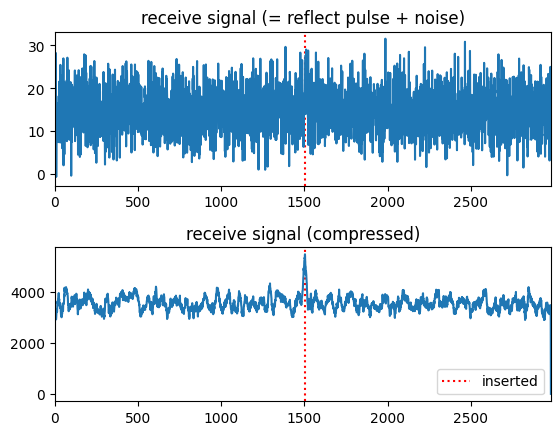

In [53]:
# Draw plot
plt.subplots_adjust(hspace=0.4)

plt.subplot(211)
plt.axvline(receive_idx, color='r', linestyle=':')
plt.plot(sample_signal)
plt.title('receive signal (= reflect pulse + noise)')
plt.xlim(0, sample_size-reference_size-1)

plt.subplot(212)
plt.axvline(receive_idx, color='r', linestyle=':', label='inserted')
plt.plot(receive_signal)
plt.title('receive signal (compressed)')
plt.xlim(0, sample_size-reference_size-1)
plt.legend(loc='lower right')
plt.show()